Principal Component Analysis

In [2]:
%matplotlib inline

In [2]:
#Importing the neccessary packages
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_mldata
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import math

In [3]:
#fetching the data
images, labels = fetch_openml(name='mnist_784', version=1, return_X_y=True)

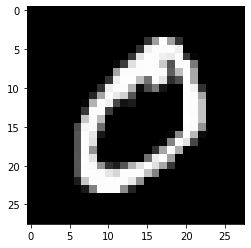

In [4]:
#plotting an arbitrary image from dataset
plt.imshow(images[1].reshape(28,28), cmap = 'gray')


In [5]:
def normalize(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    std_without_zero = std.copy()
    std_without_zero[std==0]=1.
    X_normalized = (X - mean)/std_without_zero
    return X_normalized, mean, std
    

In [6]:
X_normalized, mean, std = normalize(images)

In [7]:
cov_matrix = np.cov(X_normalized.T)

In [8]:
def eig(cov_matrix):
    eig_val_cov, eig_vec_cov = np.linalg.eig(cov_matrix)
    eig_pairs = [(np.abs(eig_val_cov[i]), eig_vec_cov[:,i]) for i in range(len(eig_val_cov))]
    eig_pairs.sort(key=lambda x: x[0], reverse= True)
    return eig_pairs

In [37]:
#compression and decompression of an image
image_number=1
no_components=100
image= images[image_number].copy()
image -= mean
std_without_zero = std.copy()
std_without_zero[std==0]=1.
image /= std_without_zero


In [38]:
top_eig_pairs = eig(cov_matrix)[:no_components]
B=[ eig_vector[1].tolist() for eig_vector in top_eig_pairs]
B=np.array(B)


In [39]:
z= np.matmul(B, image)

In [46]:
x_reconstructed = np.matmul(B.T, z)
x_reconstructed *=std_without_zero
x_reconstructed +=mean

Text(6, 33, 'Decompressed image')

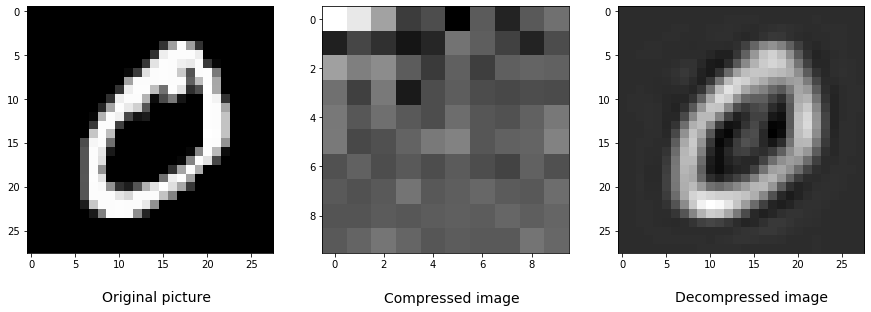

In [47]:
fig, axs = plt.subplots(1,3, figsize=(15,15))
axs[0].imshow(images[image_number].reshape(28,28), cmap='gray')
axs[0].text(8, 33, 'Original picture', fontsize=14)
axs[1].imshow(z.reshape(10,10), cmap = 'gray')
axs[1].text(2, 11.5, 'Compressed image', fontsize=14)
axs[2].imshow(x_reconstructed.reshape(28,28), cmap='gray')
axs[2].text(6, 33, 'Decompressed image', fontsize=14)